In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import category_encoders as ce
import os
import pickle
import gc
from tqdm import tqdm
import pickle
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import ensemble
import xgboost as xgb
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
import pydot

In [0]:
pip install category_encoders

     |████████████████████████████████| 102kB 3.6MB/s 


In [0]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\Rajat\\Anaconda3\\Lib\\site-packages\\graphviz\\release\\bin\\'

In [0]:
def encode_text_features(encode_decode, data_frame, encoder_isa=None, encoder_mem_type=None):
    # Implement Categorical OneHot encoding for ISA and mem-type
    if encode_decode == 'encode':
        encoder_isa = ce.one_hot.OneHotEncoder(cols=['isa'])
        encoder_mem_type = ce.one_hot.OneHotEncoder(cols=['mem-type'])
        encoder_isa.fit(data_frame, verbose=1)
        df_new1 = encoder_isa.transform(data_frame)
        encoder_mem_type.fit(df_new1, verbose=1)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
    else:
        df_new1 = encoder_isa.transform(data_frame)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
        
    return encoded_data_frame, encoder_isa, encoder_mem_type

In [0]:
def absolute_percentage_error(Y_test, Y_pred):
    error = 0
    for i in range(len(Y_test)):
        if(Y_test[i]!= 0 ):
            error = error + (abs(Y_test[i] - Y_pred[i]))/Y_test[i]
        
    error = error/ len(Y_test)
    return error[0]

In [0]:
dnn = Sequential()
dnn.add(Dense(64, input_dim = 16, activation='relu'))
# dnn_2.add(Dropout(0.4))
dnn.add(Dense(64, activation='relu'))
# dnn_2.add(Dropout(0.4))
dnn.add(Dense(64, activation='relu'))
# dnn_2.add(Dropout(0.4))
dnn.add(Dense(1, activation='linear'))
print('Model : DNN 2', dnn.summary())

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_261 (Dense)            (None, 64)                1088      
_________________________________________________________________
dense_262 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_263 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_264 (Dense)            (None, 1)                 65        
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________
Model : DNN 2 None


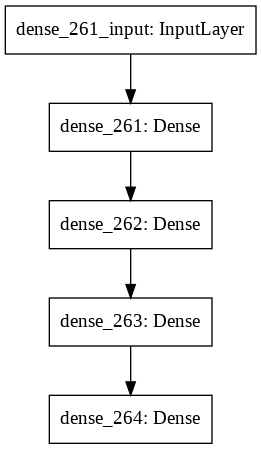

In [0]:
from keras.utils import plot_model
plot_model(dnn, to_file='model.png',)

In [0]:
def create_model(input_dim):
    dnn = Sequential()
    dnn.add(Dense(64, input_dim = input_dim, activation='relu'))
    # dnn_2.add(Dropout(0.4))
    dnn.add(Dense(64, activation='relu'))
    # dnn_2.add(Dropout(0.4))
    dnn.add(Dense(64, activation='relu'))
    # dnn_2.add(Dropout(0.4))
    dnn.add(Dense(1, activation='linear'))
    # print('Model : DNN', dnn.summary())   
    return dnn

In [0]:
def process_all_dijkstra_physical(dataset_path, dataset_name, path_for_saving_data):
    
    ################## Data Preprocessing ######################
    df = pd.read_csv(dataset_path)
    encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, 
                                                                             encoder_isa = None, encoder_mem_type=None)
    # total_data = encoded_data_frame.drop(columns = ['arch', 'arch1'])
    
    total_data = encoded_data_frame.drop(columns = ['arch'])
    total_data = total_data.fillna(0)
    X_columns = total_data.drop(columns = 'runtime').columns
    X = total_data.drop(columns = ['runtime']).to_numpy()
    Y = total_data['runtime'].to_numpy()
    print('Data X and Y shape', X.shape, Y.shape)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    ################## Data Preprocessing ######################


    
    
    
    print('####################################################################')
    r2_scores = []
    mse_scores = []
    mape_scores = []
    mae_scores = []

    # cv = KFold(n_splits = 10, random_state = 42, shuffle = True)
    cv = ShuffleSplit(n_splits=10, random_state=0)
    # print(cv)
    df = pd.DataFrame(columns = ['model_name', 'dataset_name', 'r2', 'mse', 'mape', 'mae' ])
    fold = 1
    for train_index, test_index in cv.split(X):
        model_orig = create_model(input_dim = X_train.shape[1])

        X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
        print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
        model_orig.compile(loss='mae', optimizer='adam', metrics=['mae'])
        model_orig.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 0)
        print('Model Ran for this cross validation step')
        Y_pred_fold = model_orig.predict(X_test_fold)
        '''
        # save the folds to disk
        data = [X_train_fold, X_test_fold, Y_train_fold, Y_test_fold]
        filename = path_for_saving_data + '/folds_data/' + best_models_name[k] +'_'+ str(fold) + '.pickle'
        pickle.dump(data, open(filename, 'wb'))
        '''
        
        # save the model to disk
        # serialize model to JSON
        #  filename_1 = path_for_saving_data + '/models_data/' + best_models_name[k] + '_' + str(fold) + '.json'
        # filename_2 = path_for_saving_data + '/models_data/' + best_models_name[k] + '_' + str(fold) + '.h5'
        fold = fold + 1
        '''
        model_json = model_orig.to_json()
        with open(filename_1, "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        model_orig.save_weights(filename_2)
        print("Saved model to disk")
        '''
        # later...
        '''
        # load json and create model
        json_file = open('model.json', 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        loaded_model = model_from_json(loaded_model_json)
        # load weights into new model
        loaded_model.load_weights("model.h5")
        print("Loaded model from disk")
        '''
        # some time later...
        '''
        # load the model from disk
        loaded_model = pickle.load(open(filename, 'rb'))
        result = loaded_model.score(X_test, Y_test)
        print(result)
        '''
        # scores.append(best_svr.score(X_test, y_test))
        
        plt.figure()
        plt.plot(Y_test_fold, 'b')
        plt.plot(Y_pred_fold, 'r')
        print('APE:' ,absolute_percentage_error(Y_test_fold, Y_pred_fold))
        # print('Accuracy =',accuracy_score(Y_test, Y_pred))
        r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
        mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
        mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
        mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
    
    df = df.append({'model_name': 'dnn', 'dataset_name': dataset_name
                    , 'r2': r2_scores, 'mse': mse_scores, 'mape': mape_scores, 'mae': mae_scores }, ignore_index=True)
    # k = k + 1  
    print(df.head())
    df.to_csv(dataset_name + '.csv')



Data X and Y shape (52, 20) (52,)
Train Test Split: (41, 20) (11, 20) (41,) (11,)
####################################################################
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step
APE: 0.040623724
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step
APE: 0.34566173
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step
APE: 0.32994983
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step
APE: 0.21804099
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step
APE: 0.18563183
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step
APE: 0.1284257
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step
APE: 0.09021609
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step
APE: 0.09222246
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step
APE: 0.23474856
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step
APE: 0.4274108


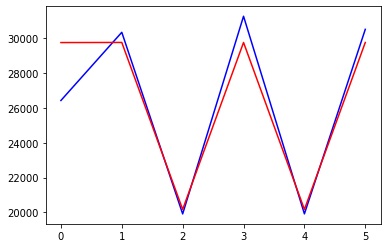

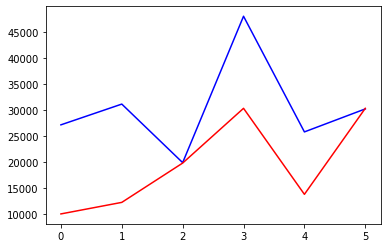

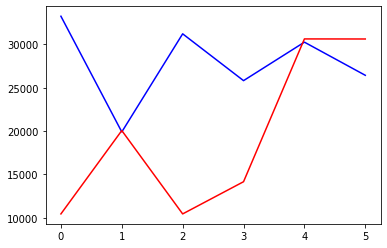

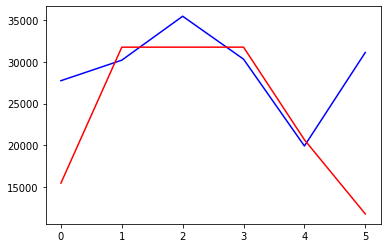

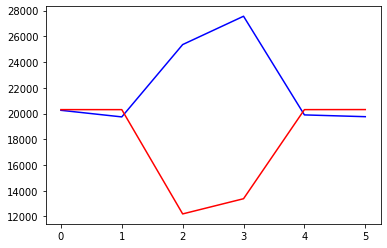

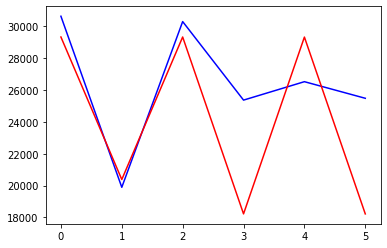

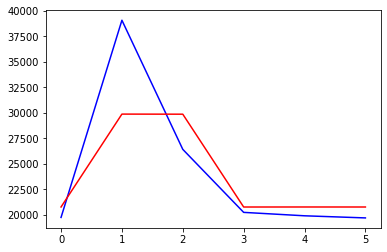

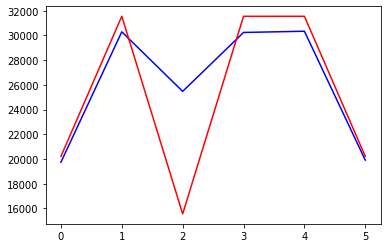

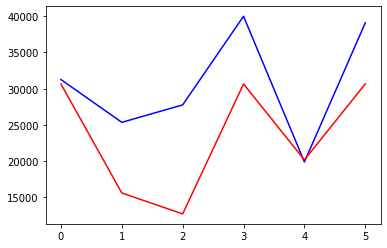

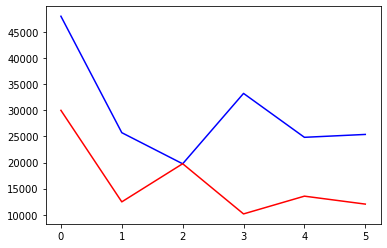

In [0]:
dataset_name = 'dijkstra_physical_results'
dataset_path = 'dijkstra_physical.csv'
path_for_saving_data = dataset_name
process_all(dataset_path, dataset_name, path_for_saving_data)

In [0]:
def process_all_dijkstra_simulated(dataset_path, dataset_name, path_for_saving_data):
    
    ################## Data Preprocessing ######################
    df = pd.read_csv(dataset_path)
    encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, 
                                                                             encoder_isa = None, encoder_mem_type=None)
    # total_data = encoded_data_frame.drop(columns = ['arch', 'arch1'])
    
    total_data = encoded_data_frame.drop(columns = ['arch'])
    total_data = total_data.fillna(0)
    X_columns = total_data.drop(columns = 'runtime').columns
    X = total_data.drop(columns = ['runtime']).to_numpy()
    Y = total_data['runtime'].to_numpy()
    # X_columns = total_data.drop(columns = 'PS').columns
    # X = total_data.drop(columns = ['runtime','PS']).to_numpy()
    # Y = total_data['runtime'].to_numpy()
    print('Data X and Y shape', X.shape, Y.shape)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    ################## Data Preprocessing ######################


    
    
    
    print('####################################################################')
    r2_scores = []
    mse_scores = []
    mape_scores = []
    mae_scores = []

    # cv = KFold(n_splits = 10, random_state = 42, shuffle = True)
    cv = ShuffleSplit(n_splits=10, random_state=0)
    # print(cv)
    df = pd.DataFrame(columns = ['model_name', 'dataset_name', 'r2', 'mse', 'mape', 'mae' ])
    fold = 1
    for train_index, test_index in cv.split(X):
        model_orig = create_model(input_dim = X_train.shape[1])

        X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
        print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
        model_orig.compile(loss='mae', optimizer='adam', metrics=['mae'])
        model_orig.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 0)
        print('Model Ran for this cross validation step:',fold)
        Y_pred_fold = model_orig.predict(X_test_fold)
        '''
        # save the folds to disk
        data = [X_train_fold, X_test_fold, Y_train_fold, Y_test_fold]
        filename = path_for_saving_data + '/folds_data/' + best_models_name[k] +'_'+ str(fold) + '.pickle'
        pickle.dump(data, open(filename, 'wb'))
        '''
        
        # save the model to disk
        # serialize model to JSON
        #  filename_1 = path_for_saving_data + '/models_data/' + best_models_name[k] + '_' + str(fold) + '.json'
        # filename_2 = path_for_saving_data + '/models_data/' + best_models_name[k] + '_' + str(fold) + '.h5'
        fold = fold + 1
        '''
        model_json = model_orig.to_json()
        with open(filename_1, "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        model_orig.save_weights(filename_2)
        print("Saved model to disk")
        '''
        # later...
        '''
        # load json and create model
        json_file = open('model.json', 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        loaded_model = model_from_json(loaded_model_json)
        # load weights into new model
        loaded_model.load_weights("model.h5")
        print("Loaded model from disk")
        '''
        # some time later...
        '''
        # load the model from disk
        loaded_model = pickle.load(open(filename, 'rb'))
        result = loaded_model.score(X_test, Y_test)
        print(result)
        '''
        # scores.append(best_svr.score(X_test, y_test))
        
        plt.figure()
        plt.plot(Y_test_fold, 'b')
        plt.plot(Y_pred_fold, 'r')
        print('APE:' ,absolute_percentage_error(Y_test_fold, Y_pred_fold))
        # print('Accuracy =',accuracy_score(Y_test, Y_pred))
        r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
        mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
        mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
        mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
    
    df = df.append({'model_name': 'dnn', 'dataset_name': dataset_name
                    , 'r2': r2_scores, 'mse': mse_scores, 'mape': mape_scores, 'mae': mae_scores }, ignore_index=True)
    k = k + 1  
    print(df.head())
    df.to_csv(dataset_name + '.csv')

Data X and Y shape (475, 22) (475,)
Train Test Split: (380, 22) (95, 22) (380,) (95,)
####################################################################
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step
APE: 0.1410559375324951
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step
APE: 0.14292099054599927
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step
APE: 0.13936976747491273
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step
APE: 0.2204896244477795
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step
APE: 0.15128681860819518
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step
APE: 0.14204424432065318
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step
APE: 0.14806733715050738
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step
APE: 0.14436861073624044
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross valida

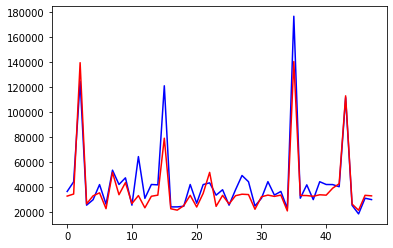

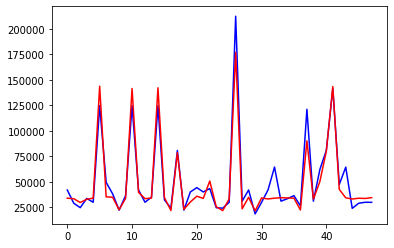

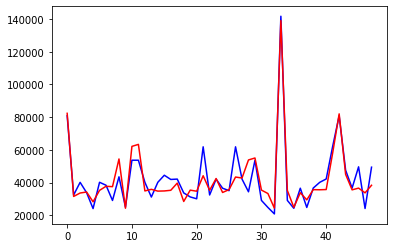

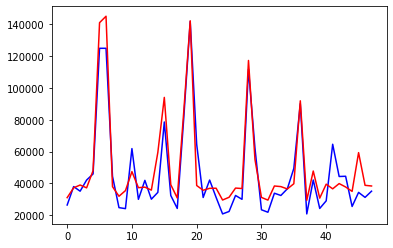

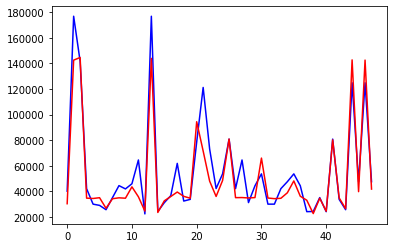

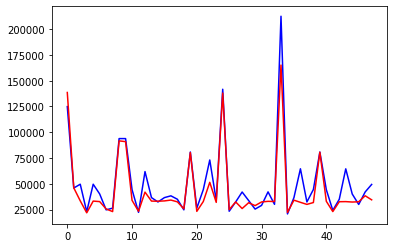

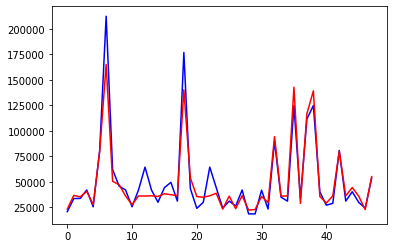

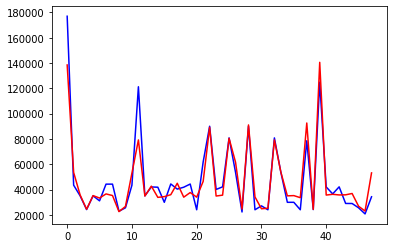

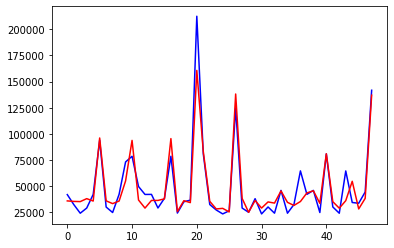

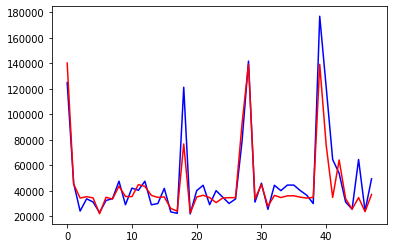

In [0]:
dataset_name = 'dijkstra_simulated_results'
dataset_path = 'dijkstra_simulated.csv'
path_for_saving_data = dataset_name
process_all(dataset_path, dataset_name, path_for_saving_data)

In [0]:
def process_all_sha_physical(dataset_path, dataset_name, path_for_saving_data):
    
    ################## Data Preprocessing ######################
    df = pd.read_csv(dataset_path)
    encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, 
                                                                             encoder_isa = None, encoder_mem_type=None)
    # total_data = encoded_data_frame.drop(columns = ['arch', 'arch1'])
    
    total_data = encoded_data_frame.drop(columns = ['arch'])
    total_data = total_data.fillna(0)
    X_columns = total_data.drop(columns = 'runtime').columns
    X = total_data.drop(columns = ['runtime']).to_numpy()
    Y = total_data['runtime'].to_numpy()
    # X_columns = total_data.drop(columns = 'PS').columns
    # X = total_data.drop(columns = ['runtime','PS']).to_numpy()
    # Y = total_data['runtime'].to_numpy()
    print('Data X and Y shape', X.shape, Y.shape)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    ################## Data Preprocessing ######################


    
    
    
    print('####################################################################')
    r2_scores = []
    mse_scores = []
    mape_scores = []
    mae_scores = []

    # cv = KFold(n_splits = 10, random_state = 42, shuffle = True)
    cv = ShuffleSplit(n_splits=10, random_state=0)
    # print(cv)
    df = pd.DataFrame(columns = ['model_name', 'dataset_name', 'r2', 'mse', 'mape', 'mae' ])
    fold = 1
    for train_index, test_index in cv.split(X):
        model_orig = create_model(input_dim = X.shape[1])

        X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
        print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
        model_orig.compile(loss='mae', optimizer='adam', metrics=['mae'])
        model_orig.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 0)
        print('Model Ran for this cross validation step:', fold)
        Y_pred_fold = model_orig.predict(X_test_fold)
        '''
        # save the folds to disk
        data = [X_train_fold, X_test_fold, Y_train_fold, Y_test_fold]
        filename = path_for_saving_data + '/folds_data/' + best_models_name[k] +'_'+ str(fold) + '.pickle'
        pickle.dump(data, open(filename, 'wb'))
        '''
        
        # save the model to disk
        # serialize model to JSON
        #  filename_1 = path_for_saving_data + '/models_data/' + best_models_name[k] + '_' + str(fold) + '.json'
        # filename_2 = path_for_saving_data + '/models_data/' + best_models_name[k] + '_' + str(fold) + '.h5'
        fold = fold + 1
        '''
        model_json = model_orig.to_json()
        with open(filename_1, "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        model_orig.save_weights(filename_2)
        print("Saved model to disk")
        '''
        # later...
        '''
        # load json and create model
        json_file = open('model.json', 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        loaded_model = model_from_json(loaded_model_json)
        # load weights into new model
        loaded_model.load_weights("model.h5")
        print("Loaded model from disk")
        '''
        # some time later...
        '''
        # load the model from disk
        loaded_model = pickle.load(open(filename, 'rb'))
        result = loaded_model.score(X_test, Y_test)
        print(result)
        '''
        # scores.append(best_svr.score(X_test, y_test))
        
        plt.figure()
        plt.plot(Y_test_fold, 'b')
        plt.plot(Y_pred_fold, 'r')
        print('APE:' ,absolute_percentage_error(Y_test_fold, Y_pred_fold))
        # print('Accuracy =',accuracy_score(Y_test, Y_pred))
        r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
        mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
        mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
        mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
    
    df = df.append({'model_name': 'dnn', 'dataset_name': dataset_name
                    , 'r2': r2_scores, 'mse': mse_scores, 'mape': mape_scores, 'mae': mae_scores }, ignore_index=True)
    fold = fold + 1  
    print(df.head())
    df.to_csv(dataset_name + '.csv')

Data X and Y shape (52, 20) (52,)
####################################################################
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step
APE: 0.06858994
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step
APE: 0.15784602
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step
APE: 0.11138264
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step
APE: 0.09082086
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step
APE: 0.06873655
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step
APE: 0.05267188
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step
APE: 0.07523267
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step
APE: 0.029913345
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step
APE: 0.08123415
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step
APE: 0.12227254
  model_name  ...                             

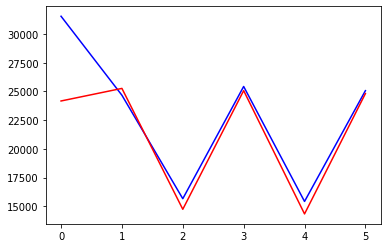

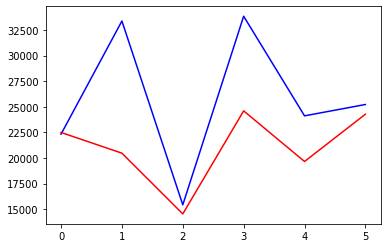

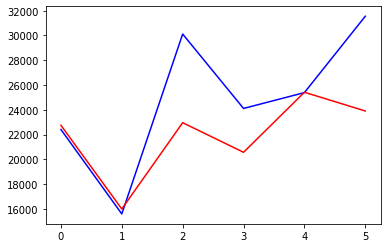

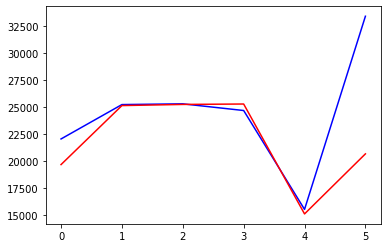

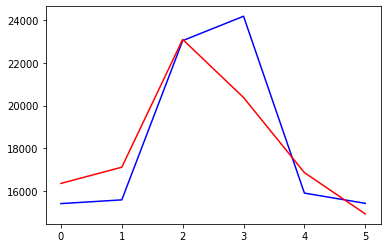

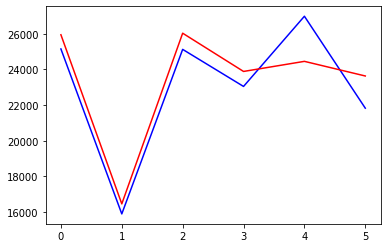

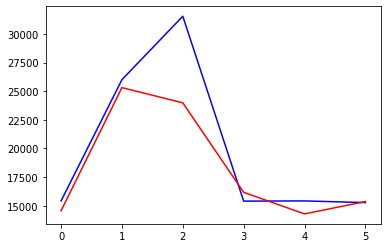

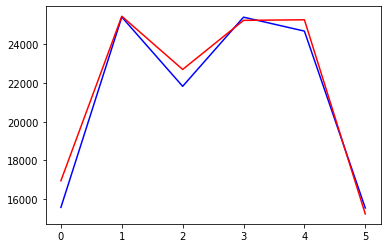

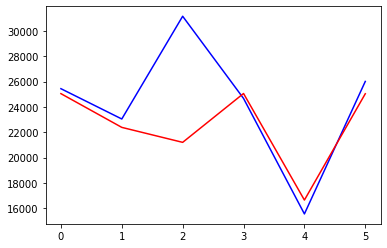

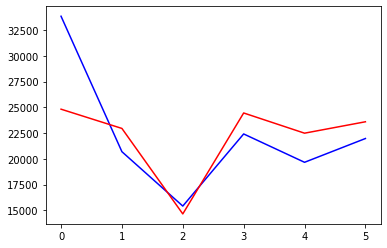

In [0]:
dataset_name = 'sha_physical_results'
dataset_path = 'sha_physical.csv'
path_for_saving_data = dataset_name
process_all_sha_physical(dataset_path, dataset_name, path_for_saving_data)

In [0]:
def process_all_sha_simulated(dataset_path, dataset_name, path_for_saving_data):
    
    ################## Data Preprocessing ######################
    df = pd.read_csv(dataset_path)
    encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, 
                                                                             encoder_isa = None, encoder_mem_type=None)
    # total_data = encoded_data_frame.drop(columns = ['arch', 'arch1'])
    
    total_data = encoded_data_frame.drop(columns = ['arch'])
    total_data = total_data.fillna(0)
    X_columns = total_data.drop(columns = 'runtime').columns
    X = total_data.drop(columns = ['runtime']).to_numpy()
    Y = total_data['runtime'].to_numpy()
    # X_columns = total_data.drop(columns = 'PS').columns
    # X = total_data.drop(columns = ['runtime','PS']).to_numpy()
    # Y = total_data['runtime'].to_numpy()
    print('Data X and Y shape', X.shape, Y.shape)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    ################## Data Preprocessing ######################


    
    
    
    print('####################################################################')
    r2_scores = []
    mse_scores = []
    mape_scores = []
    mae_scores = []

    # cv = KFold(n_splits = 10, random_state = 42, shuffle = True)
    cv = ShuffleSplit(n_splits=10, random_state=0)
    # print(cv)
    df = pd.DataFrame(columns = ['model_name', 'dataset_name', 'r2', 'mse', 'mape', 'mae' ])
    fold = 1
    for train_index, test_index in cv.split(X):
        model_orig = create_model(input_dim = X.shape[1])

        X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
        print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
        model_orig.compile(loss='mae', optimizer='adam', metrics=['mae'])
        model_orig.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 0)
        print('Model Ran for this cross validation step:', fold)
        Y_pred_fold = model_orig.predict(X_test_fold)
        '''
        # save the folds to disk
        data = [X_train_fold, X_test_fold, Y_train_fold, Y_test_fold]
        filename = path_for_saving_data + '/folds_data/' + best_models_name[k] +'_'+ str(fold) + '.pickle'
        pickle.dump(data, open(filename, 'wb'))
        '''
        
        # save the model to disk
        # serialize model to JSON
        #  filename_1 = path_for_saving_data + '/models_data/' + best_models_name[k] + '_' + str(fold) + '.json'
        # filename_2 = path_for_saving_data + '/models_data/' + best_models_name[k] + '_' + str(fold) + '.h5'
        fold = fold + 1
        '''
        model_json = model_orig.to_json()
        with open(filename_1, "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        model_orig.save_weights(filename_2)
        print("Saved model to disk")
        '''
        # later...
        '''
        # load json and create model
        json_file = open('model.json', 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        loaded_model = model_from_json(loaded_model_json)
        # load weights into new model
        loaded_model.load_weights("model.h5")
        print("Loaded model from disk")
        '''
        # some time later...
        '''
        # load the model from disk
        loaded_model = pickle.load(open(filename, 'rb'))
        result = loaded_model.score(X_test, Y_test)
        print(result)
        '''
        # scores.append(best_svr.score(X_test, y_test))
        
        plt.figure()
        plt.plot(Y_test_fold, 'b')
        plt.plot(Y_pred_fold, 'r')
        print('APE:' ,absolute_percentage_error(Y_test_fold, Y_pred_fold))
        # print('Accuracy =',accuracy_score(Y_test, Y_pred))
        r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
        mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
        mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
        mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
    
    df = df.append({'model_name': 'dnn', 'dataset_name': dataset_name
                    , 'r2': r2_scores, 'mse': mse_scores, 'mape': mape_scores, 'mae': mae_scores }, ignore_index=True)
    fold = fold + 1  
    print(df.head())
    df.to_csv(dataset_name + '.csv')

Data X and Y shape (475, 22) (475,)
####################################################################
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step
APE: 0.014207844
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step
APE: 0.018634789
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step
APE: 0.01112494
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step
APE: 0.024260351
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step
APE: 0.016203484
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step
APE: 0.017122904
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step
APE: 0.016506817
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step
APE: 0.016930321
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step
APE: 0.026778864
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step
APE: 0.015201

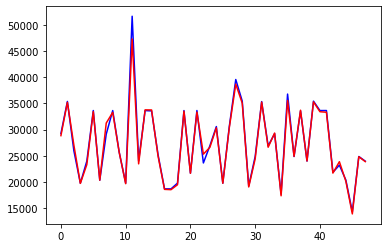

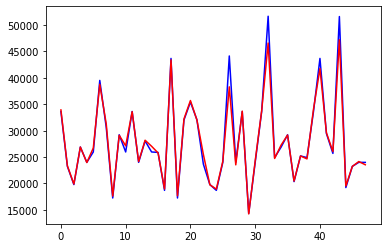

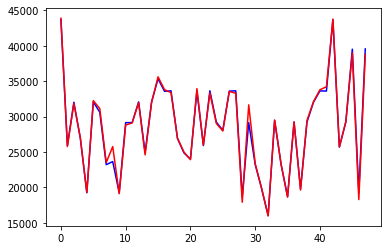

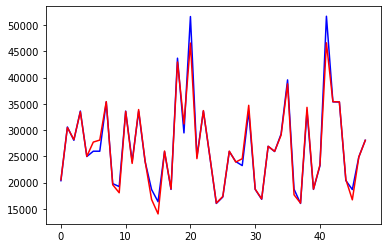

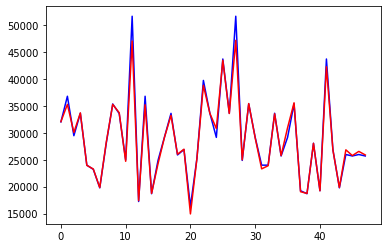

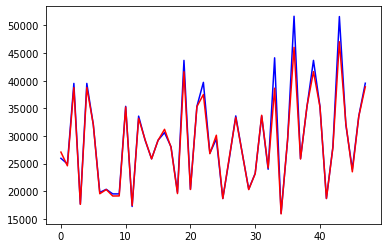

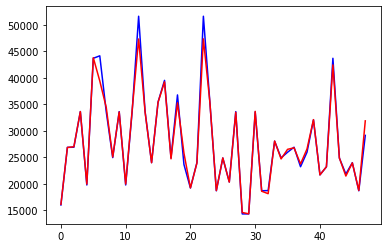

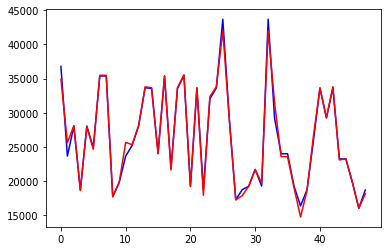

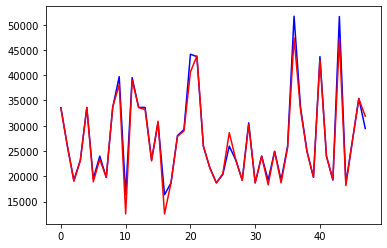

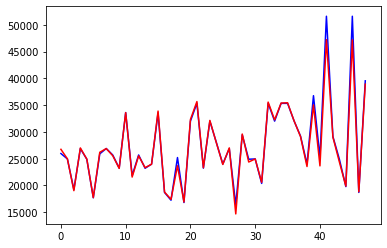

In [0]:
dataset_name = 'sha_simulated_results'
dataset_path = 'sha_simulated.csv'
path_for_saving_data = dataset_name
process_all_sha_physical(dataset_path, dataset_name, path_for_saving_data)

In [0]:
def process_all_stitch_physical(dataset_path, dataset_name, path_for_saving_data):
    
    ################## Data Preprocessing ######################
    df = pd.read_csv(dataset_path)
    encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, 
                                                                             encoder_isa = None, encoder_mem_type=None)
    # total_data = encoded_data_frame.drop(columns = ['arch', 'arch1'])
    
    total_data = encoded_data_frame.drop(columns = ['arch'])
    total_data = total_data.fillna(0)
    X_columns = total_data.drop(columns = 'runtime').columns
    X = total_data.drop(columns = ['runtime']).to_numpy()
    Y = total_data['runtime'].to_numpy()
    # X_columns = total_data.drop(columns = 'PS').columns
    # X = total_data.drop(columns = ['runtime','PS']).to_numpy()
    # Y = total_data['runtime'].to_numpy()
    print('Data X and Y shape', X.shape, Y.shape)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    ################## Data Preprocessing ######################


    
    
    
    print('####################################################################')
    r2_scores = []
    mse_scores = []
    mape_scores = []
    mae_scores = []

    # cv = KFold(n_splits = 10, random_state = 42, shuffle = True)
    cv = ShuffleSplit(n_splits=10, random_state=0)
    # print(cv)
    df = pd.DataFrame(columns = ['model_name', 'dataset_name', 'r2', 'mse', 'mape', 'mae' ])
    fold = 1
    for train_index, test_index in cv.split(X):
        model_orig = create_model(input_dim = X.shape[1])

        X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
        print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
        model_orig.compile(loss='mae', optimizer='adam', metrics=['mae'])
        model_orig.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 0)
        print('Model Ran for this cross validation step:', fold)
        Y_pred_fold = model_orig.predict(X_test_fold)
        '''
        # save the folds to disk
        data = [X_train_fold, X_test_fold, Y_train_fold, Y_test_fold]
        filename = path_for_saving_data + '/folds_data/' + best_models_name[k] +'_'+ str(fold) + '.pickle'
        pickle.dump(data, open(filename, 'wb'))
        '''
        
        # save the model to disk
        # serialize model to JSON
        #  filename_1 = path_for_saving_data + '/models_data/' + best_models_name[k] + '_' + str(fold) + '.json'
        # filename_2 = path_for_saving_data + '/models_data/' + best_models_name[k] + '_' + str(fold) + '.h5'
        fold = fold + 1
        '''
        model_json = model_orig.to_json()
        with open(filename_1, "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        model_orig.save_weights(filename_2)
        print("Saved model to disk")
        '''
        # later...
        '''
        # load json and create model
        json_file = open('model.json', 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        loaded_model = model_from_json(loaded_model_json)
        # load weights into new model
        loaded_model.load_weights("model.h5")
        print("Loaded model from disk")
        '''
        # some time later...
        '''
        # load the model from disk
        loaded_model = pickle.load(open(filename, 'rb'))
        result = loaded_model.score(X_test, Y_test)
        print(result)
        '''
        # scores.append(best_svr.score(X_test, y_test))
        
        plt.figure()
        plt.plot(Y_test_fold, 'b')
        plt.plot(Y_pred_fold, 'r')
        print('APE:' ,absolute_percentage_error(Y_test_fold, Y_pred_fold))
        # print('Accuracy =',accuracy_score(Y_test, Y_pred))
        r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
        mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
        mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
        mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
    
    df = df.append({'model_name': 'dnn', 'dataset_name': dataset_name
                    , 'r2': r2_scores, 'mse': mse_scores, 'mape': mape_scores, 'mae': mae_scores }, ignore_index=True)
    fold = fold + 1  
    print(df.head())
    df.to_csv(dataset_name + '.csv')

Data X and Y shape (52, 20) (52,)
####################################################################
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step: 1
APE: 0.07308612
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step: 2
APE: 0.0635556
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step: 3
APE: 0.04152103
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step: 4
APE: 0.05929173
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step: 5
APE: 0.08762693
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step: 6
APE: 0.11166278
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step: 7
APE: 0.054850157
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step: 8
APE: 0.034835298
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step: 9
APE: 0.11751156
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step: 10
APE: 0.07330376
  model_name  .

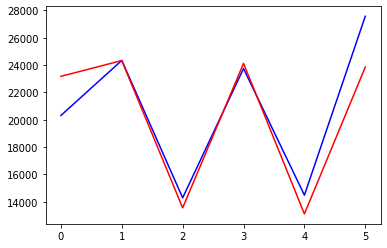

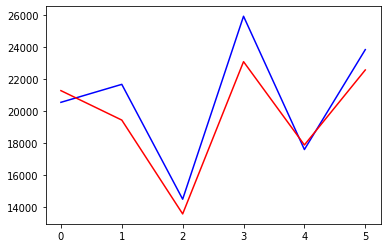

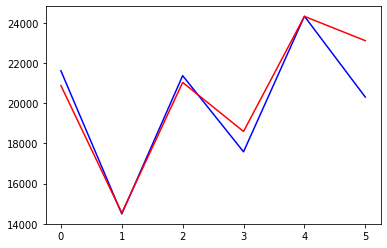

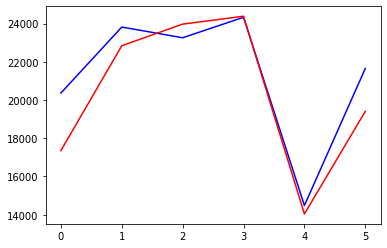

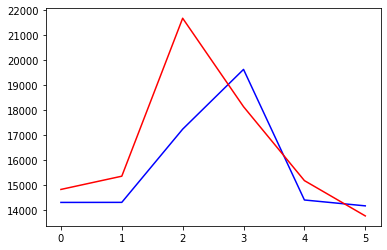

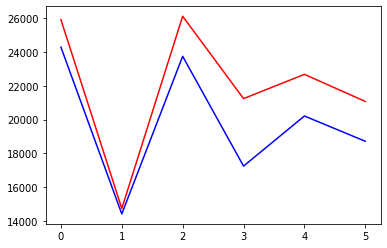

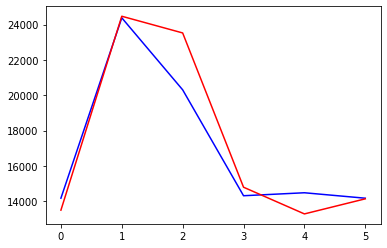

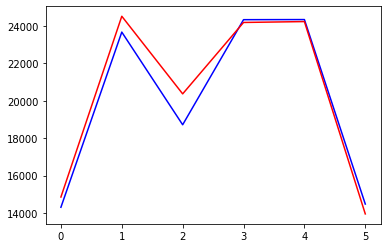

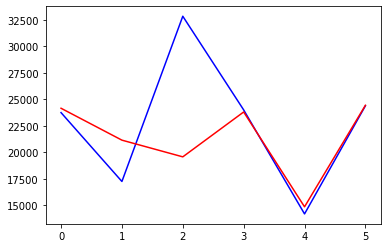

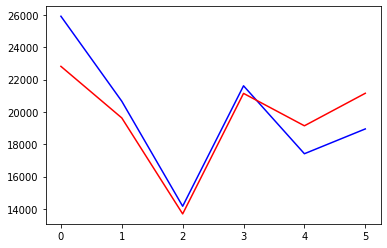

In [0]:
dataset_name = 'stitch_physical_results'
dataset_path = 'stitch_physical.csv'
path_for_saving_data = dataset_name
process_all_stitch_physical(dataset_path, dataset_name, path_for_saving_data)

In [0]:
def process_all_stitch_simulated(dataset_path, dataset_name, path_for_saving_data):
    
    ################## Data Preprocessing ######################
    df = pd.read_csv(dataset_path)
    encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, 
                                                                             encoder_isa = None, encoder_mem_type=None)
    # total_data = encoded_data_frame.drop(columns = ['arch', 'arch1'])
    
    total_data = encoded_data_frame.drop(columns = ['arch'])
    total_data = total_data.fillna(0)
    X_columns = total_data.drop(columns = 'runtime').columns
    X = total_data.drop(columns = ['runtime']).to_numpy()
    Y = total_data['runtime'].to_numpy()
    # X_columns = total_data.drop(columns = 'PS').columns
    # X = total_data.drop(columns = ['runtime','PS']).to_numpy()
    # Y = total_data['runtime'].to_numpy()
    print('Data X and Y shape', X.shape, Y.shape)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    ################## Data Preprocessing ######################


    
    
    
    print('####################################################################')
    r2_scores = []
    mse_scores = []
    mape_scores = []
    mae_scores = []

    # cv = KFold(n_splits = 10, random_state = 42, shuffle = True)
    cv = ShuffleSplit(n_splits=10, random_state=0)
    # print(cv)
    df = pd.DataFrame(columns = ['model_name', 'dataset_name', 'r2', 'mse', 'mape', 'mae' ])
    fold = 1
    for train_index, test_index in cv.split(X):
        model_orig = create_model(input_dim = X.shape[1])

        X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
        print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
        model_orig.compile(loss='mae', optimizer='adam', metrics=['mae'])
        model_orig.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 0)
        print('Model Ran for this cross validation step:', fold)
        Y_pred_fold = model_orig.predict(X_test_fold)
        '''
        # save the folds to disk
        data = [X_train_fold, X_test_fold, Y_train_fold, Y_test_fold]
        filename = path_for_saving_data + '/folds_data/' + best_models_name[k] +'_'+ str(fold) + '.pickle'
        pickle.dump(data, open(filename, 'wb'))
        '''
        
        # save the model to disk
        # serialize model to JSON
        #  filename_1 = path_for_saving_data + '/models_data/' + best_models_name[k] + '_' + str(fold) + '.json'
        # filename_2 = path_for_saving_data + '/models_data/' + best_models_name[k] + '_' + str(fold) + '.h5'
        fold = fold + 1
        '''
        model_json = model_orig.to_json()
        with open(filename_1, "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        model_orig.save_weights(filename_2)
        print("Saved model to disk")
        '''
        # later...
        '''
        # load json and create model
        json_file = open('model.json', 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        loaded_model = model_from_json(loaded_model_json)
        # load weights into new model
        loaded_model.load_weights("model.h5")
        print("Loaded model from disk")
        '''
        # some time later...
        '''
        # load the model from disk
        loaded_model = pickle.load(open(filename, 'rb'))
        result = loaded_model.score(X_test, Y_test)
        print(result)
        '''
        # scores.append(best_svr.score(X_test, y_test))
        
        plt.figure()
        plt.plot(Y_test_fold, 'b')
        plt.plot(Y_pred_fold, 'r')
        print('APE:' ,absolute_percentage_error(Y_test_fold, Y_pred_fold))
        # print('Accuracy =',accuracy_score(Y_test, Y_pred))
        r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
        mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
        mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
        mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
    
    df = df.append({'model_name': 'dnn', 'dataset_name': dataset_name
                    , 'r2': r2_scores, 'mse': mse_scores, 'mape': mape_scores, 'mae': mae_scores }, ignore_index=True)
    fold = fold + 1  
    print(df.head())
    df.to_csv(dataset_name + '.csv')

Data X and Y shape (475, 22) (475,)
####################################################################
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step: 1
APE: 0.018785253
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step: 2
APE: 0.040232163
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step: 3
APE: 0.07164668
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step: 4
APE: 0.029803468
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step: 5
APE: 0.043740343
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step: 6
APE: 0.02772337
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step: 7
APE: 0.04043637
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step: 8
APE: 0.023006914
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step: 9
APE: 0.048964236
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross vali

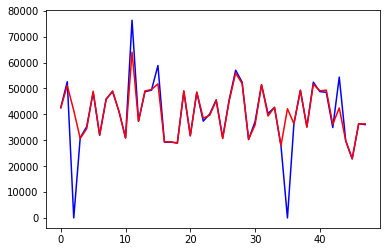

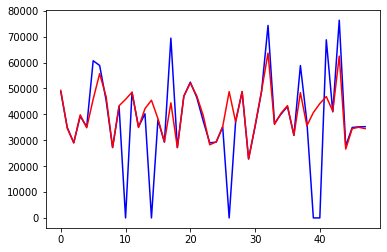

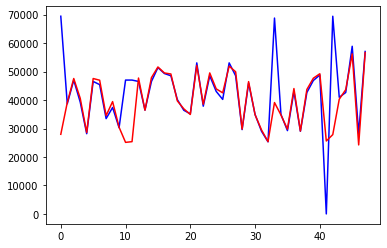

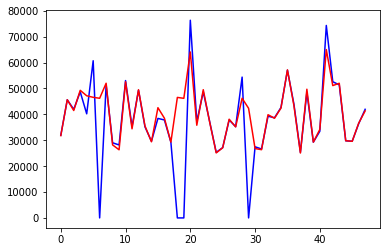

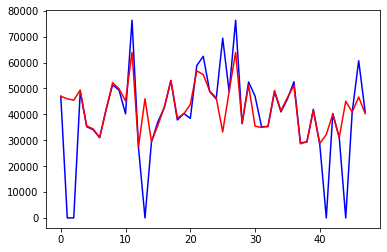

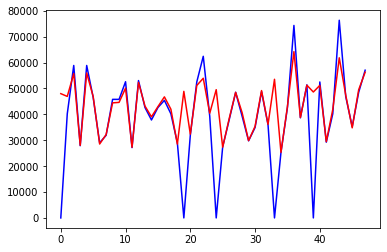

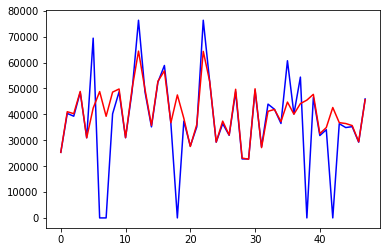

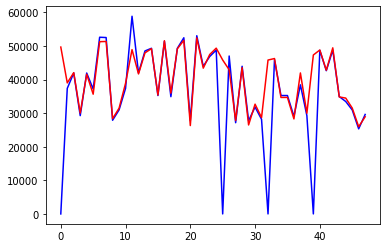

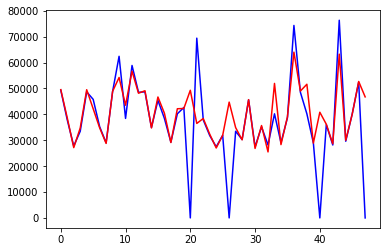

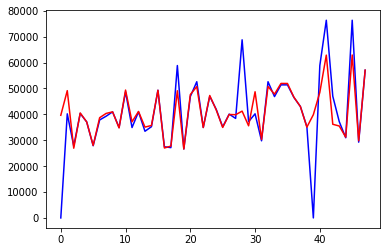

In [0]:
dataset_name = 'stitch_simulated_results'
dataset_path = 'stitch_simulated.csv'
path_for_saving_data = dataset_name
process_all_stitch_simulated(dataset_path, dataset_name, path_for_saving_data)

In [0]:
def process_all_svm_physical(dataset_path, dataset_name, path_for_saving_data):
    
    ################## Data Preprocessing ######################
    df = pd.read_csv(dataset_path)
    encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, 
                                                                             encoder_isa = None, encoder_mem_type=None)
    # total_data = encoded_data_frame.drop(columns = ['arch', 'arch1'])
    
    total_data = encoded_data_frame.drop(columns = ['arch'])
    total_data = total_data.fillna(0)
    X_columns = total_data.drop(columns = 'runtime').columns
    X = total_data.drop(columns = ['runtime']).to_numpy()
    Y = total_data['runtime'].to_numpy()
    # X_columns = total_data.drop(columns = 'PS').columns
    # X = total_data.drop(columns = ['runtime','PS']).to_numpy()
    # Y = total_data['runtime'].to_numpy()
    print('Data X and Y shape', X.shape, Y.shape)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    ################## Data Preprocessing ######################


    
    
    
    print('####################################################################')
    r2_scores = []
    mse_scores = []
    mape_scores = []
    mae_scores = []

    # cv = KFold(n_splits = 10, random_state = 42, shuffle = True)
    cv = ShuffleSplit(n_splits=10, random_state=0)
    # print(cv)
    df = pd.DataFrame(columns = ['model_name', 'dataset_name', 'r2', 'mse', 'mape', 'mae' ])
    fold = 1
    for train_index, test_index in cv.split(X):
        model_orig = create_model(input_dim = X.shape[1])

        X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
        print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
        model_orig.compile(loss='mae', optimizer='adam', metrics=['mae'])
        model_orig.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 0)
        print('Model Ran for this cross validation step:', fold)
        Y_pred_fold = model_orig.predict(X_test_fold)
        '''
        # save the folds to disk
        data = [X_train_fold, X_test_fold, Y_train_fold, Y_test_fold]
        filename = path_for_saving_data + '/folds_data/' + best_models_name[k] +'_'+ str(fold) + '.pickle'
        pickle.dump(data, open(filename, 'wb'))
        '''
        
        # save the model to disk
        # serialize model to JSON
        #  filename_1 = path_for_saving_data + '/models_data/' + best_models_name[k] + '_' + str(fold) + '.json'
        # filename_2 = path_for_saving_data + '/models_data/' + best_models_name[k] + '_' + str(fold) + '.h5'
        fold = fold + 1
        '''
        model_json = model_orig.to_json()
        with open(filename_1, "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        model_orig.save_weights(filename_2)
        print("Saved model to disk")
        '''
        # later...
        '''
        # load json and create model
        json_file = open('model.json', 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        loaded_model = model_from_json(loaded_model_json)
        # load weights into new model
        loaded_model.load_weights("model.h5")
        print("Loaded model from disk")
        '''
        # some time later...
        '''
        # load the model from disk
        loaded_model = pickle.load(open(filename, 'rb'))
        result = loaded_model.score(X_test, Y_test)
        print(result)
        '''
        # scores.append(best_svr.score(X_test, y_test))
        
        plt.figure()
        plt.plot(Y_test_fold, 'b')
        plt.plot(Y_pred_fold, 'r')
        print('APE:' ,absolute_percentage_error(Y_test_fold, Y_pred_fold))
        # print('Accuracy =',accuracy_score(Y_test, Y_pred))
        r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
        mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
        mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
        mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
    
    df = df.append({'model_name': 'dnn', 'dataset_name': dataset_name
                    , 'r2': r2_scores, 'mse': mse_scores, 'mape': mape_scores, 'mae': mae_scores }, ignore_index=True)
    fold = fold + 1  
    print(df.head())
    df.to_csv(dataset_name + '.csv')

Data X and Y shape (52, 20) (52,)
####################################################################
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step: 1
APE: 0.03692937
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step: 2
APE: 0.051496204
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step: 3
APE: 0.04997945
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step: 4
APE: 0.040775064
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step: 5
APE: 0.096400686
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step: 6
APE: 0.08485415
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step: 7
APE: 0.0497506
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step: 8
APE: 0.048388183
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step: 9
APE: 0.04347561
(46, 20) (6, 20) (46,) (6,)
Model Ran for this cross validation step: 10
APE: 0.07585732
  model_name 

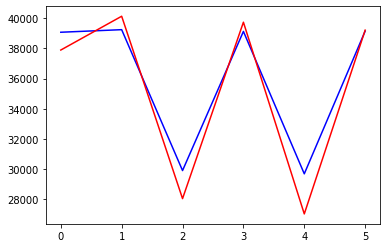

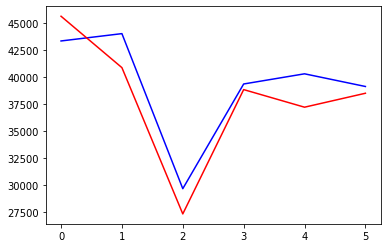

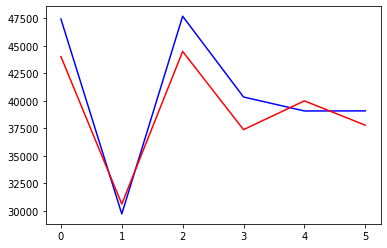

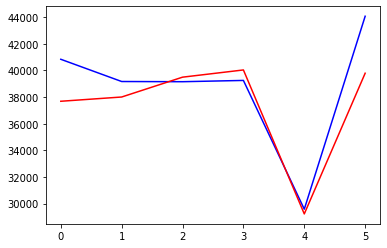

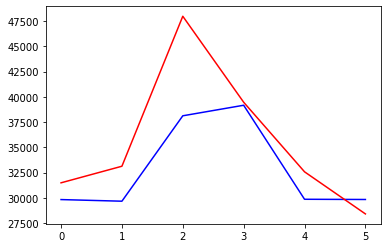

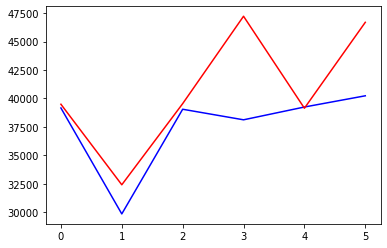

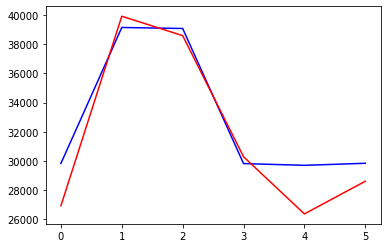

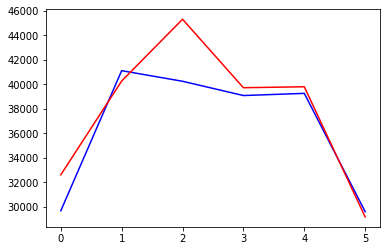

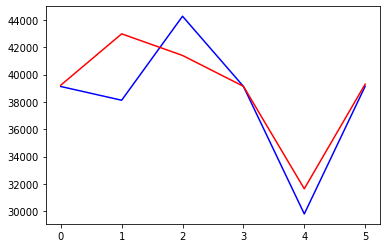

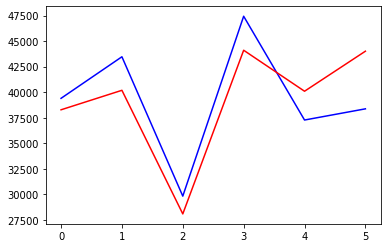

In [0]:
dataset_name = 'svm_physical_results'
dataset_path = 'svm_physical.csv'
path_for_saving_data = dataset_name
process_all_svm_physical(dataset_path, dataset_name, path_for_saving_data)

In [0]:
dataset_name = 'svm_simulated_results'
dataset_path = 'svm_simulated.csv'
path_for_saving_data = dataset_name
process_all_svm_physical(dataset_path, dataset_name, path_for_saving_data)

Data X and Y shape (475, 22) (475,)
####################################################################
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step: 1
APE: 0.02325434
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step: 2
APE: 0.027780965
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step: 3
APE: 0.04115393
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step: 4
APE: 0.021846987
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step: 5
APE: 0.037994284
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step: 6
APE: 0.02186732
(427, 22) (48, 22) (427,) (48,)
Model Ran for this cross validation step: 7
APE: 0.024994554
(427, 22) (48, 22) (427,) (48,)


In [0]:
dataset_name = 'runtimes_final_mantevo_miniFE_results'
dataset_path = 'runtimes_final_mantevo_miniFE.csv'
path_for_saving_data = dataset_name
process_all_svm_physical(dataset_path, dataset_name, path_for_saving_data)

Data X and Y shape (108, 21) (108,)
####################################################################
(97, 21) (11, 21) (97,) (11,)
Model Ran for this cross validation step: 1
APE: 0.17741138
(97, 21) (11, 21) (97,) (11,)
Model Ran for this cross validation step: 2
APE: 0.10632989
(97, 21) (11, 21) (97,) (11,)
Model Ran for this cross validation step: 3
APE: 0.10494732
(97, 21) (11, 21) (97,) (11,)
Model Ran for this cross validation step: 4
APE: 0.087689236
(97, 21) (11, 21) (97,) (11,)
Model Ran for this cross validation step: 5
APE: 0.11064825
(97, 21) (11, 21) (97,) (11,)
Model Ran for this cross validation step: 6
APE: 0.06628802
(97, 21) (11, 21) (97,) (11,)
Model Ran for this cross validation step: 7
APE: 0.10454471
(97, 21) (11, 21) (97,) (11,)
Model Ran for this cross validation step: 8
APE: 0.15447941
(97, 21) (11, 21) (97,) (11,)
Model Ran for this cross validation step: 9
APE: 0.09578106
(97, 21) (11, 21) (97,) (11,)
Model Ran for this cross validation step: 10
APE: 0.05

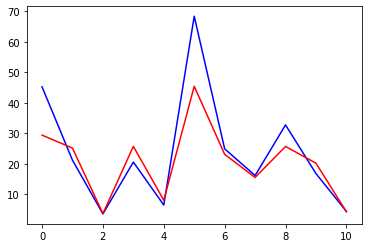

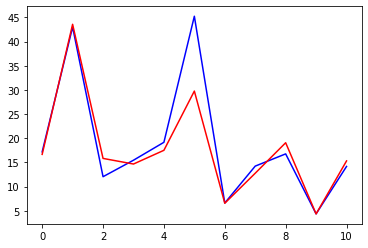

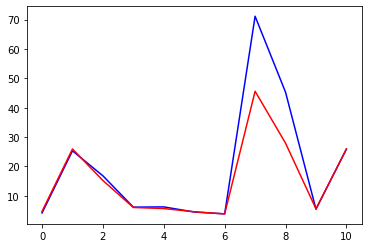

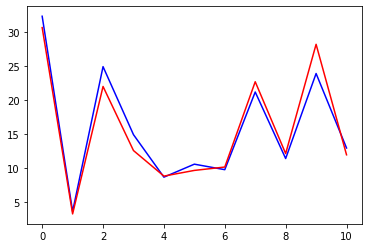

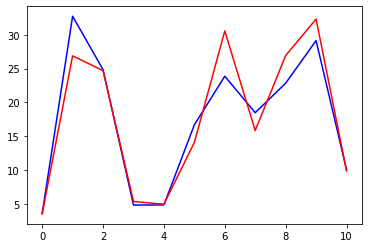

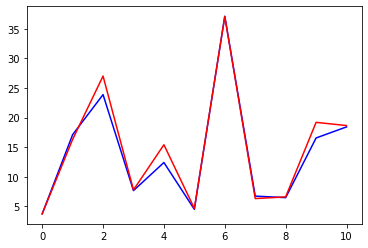

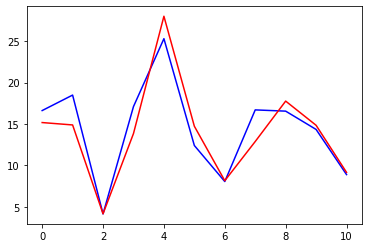

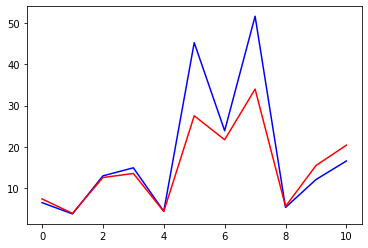

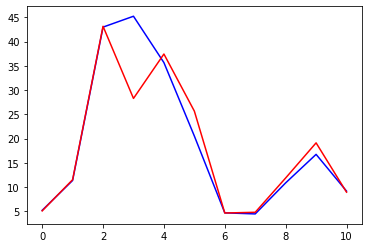

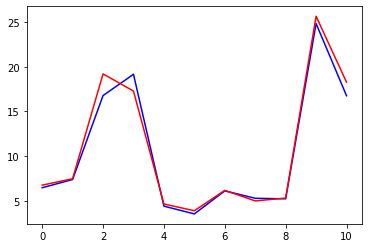

In [0]:
dataset_name = 'runtimes_final_npb_ep_results'
dataset_path = 'runtimes_final_npb_ep.csv'
path_for_saving_data = dataset_name
process_all_svm_physical(dataset_path, dataset_name, path_for_saving_data)

Data X and Y shape (108, 21) (108,)
####################################################################
(97, 21) (11, 21) (97,) (11,)
Model Ran for this cross validation step: 1
APE: 0.116991155
(97, 21) (11, 21) (97,) (11,)
Model Ran for this cross validation step: 2
APE: 0.06785801
(97, 21) (11, 21) (97,) (11,)
Model Ran for this cross validation step: 3
APE: 0.10819972
(97, 21) (11, 21) (97,) (11,)
Model Ran for this cross validation step: 4
APE: 0.15718508
(97, 21) (11, 21) (97,) (11,)
Model Ran for this cross validation step: 5
APE: 0.06581951
(97, 21) (11, 21) (97,) (11,)
Model Ran for this cross validation step: 6
APE: 0.08388603
(97, 21) (11, 21) (97,) (11,)
Model Ran for this cross validation step: 7
APE: 0.041089263
(97, 21) (11, 21) (97,) (11,)
Model Ran for this cross validation step: 8
APE: 0.07545031
(97, 21) (11, 21) (97,) (11,)
Model Ran for this cross validation step: 9
APE: 0.052719627
(97, 21) (11, 21) (97,) (11,)
Model Ran for this cross validation step: 10
APE: 0.

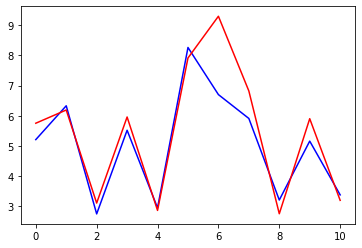

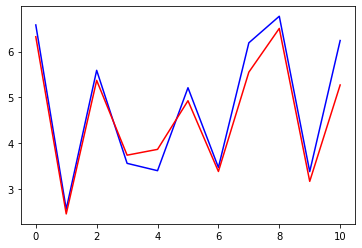

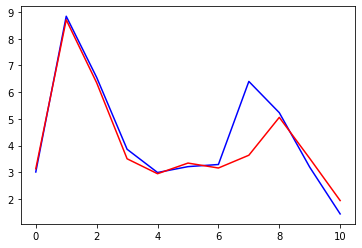

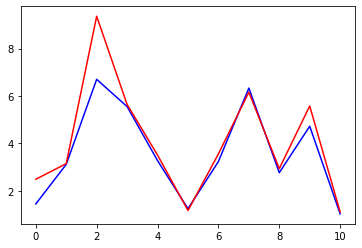

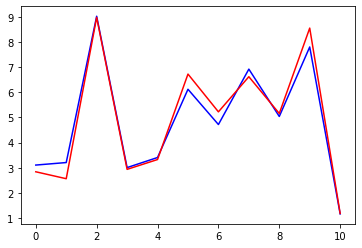

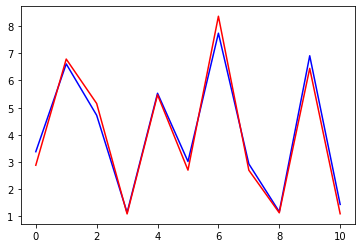

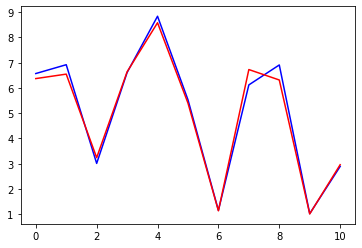

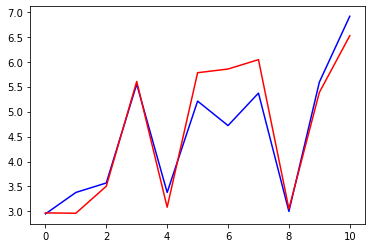

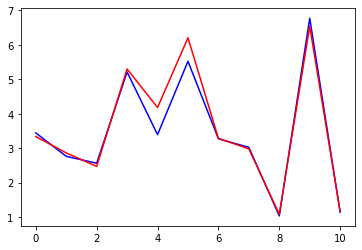

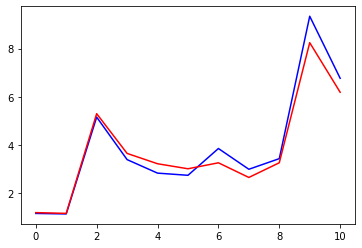

In [0]:
dataset_name = 'runtimes_final_npb_mg_results'
dataset_path = 'runtimes_final_npb_mg.csv'
path_for_saving_data = dataset_name
process_all_svm_physical(dataset_path, dataset_name, path_for_saving_data)

Data X and Y shape (2850, 23) (2850,)
####################################################################
(2565, 23) (285, 23) (2565,) (285,)
Model Ran for this cross validation step: 1
APE: 0.016342921
(2565, 23) (285, 23) (2565,) (285,)
Model Ran for this cross validation step: 2
APE: 0.013247803
(2565, 23) (285, 23) (2565,) (285,)
Model Ran for this cross validation step: 3
APE: 0.015252506
(2565, 23) (285, 23) (2565,) (285,)
Model Ran for this cross validation step: 4
APE: 0.01487846
(2565, 23) (285, 23) (2565,) (285,)
Model Ran for this cross validation step: 5
APE: 0.012475012
(2565, 23) (285, 23) (2565,) (285,)
Model Ran for this cross validation step: 6
APE: 0.011777087
(2565, 23) (285, 23) (2565,) (285,)
Model Ran for this cross validation step: 7
APE: 0.011515974
(2565, 23) (285, 23) (2565,) (285,)
Model Ran for this cross validation step: 8
APE: 0.013750572
(2565, 23) (285, 23) (2565,) (285,)
Model Ran for this cross validation step: 9
APE: 0.00941244
(2565, 23) (285, 23) (

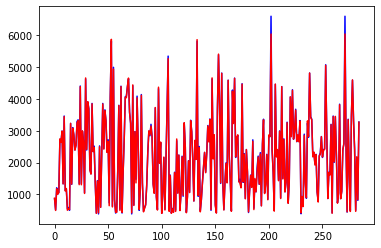

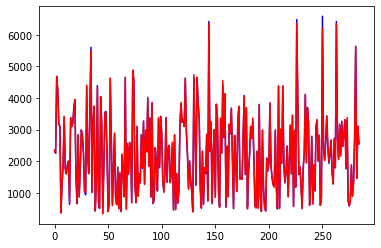

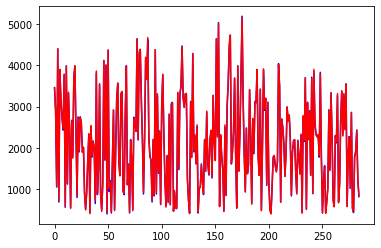

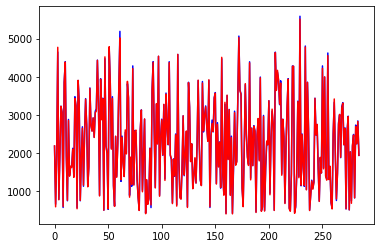

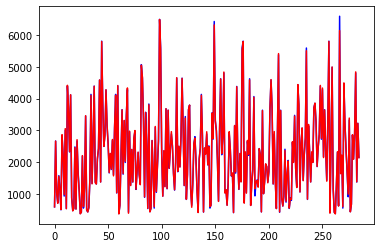

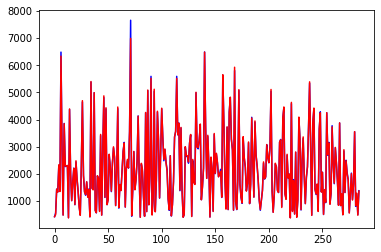

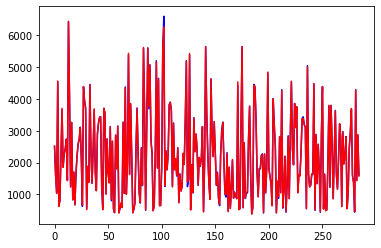

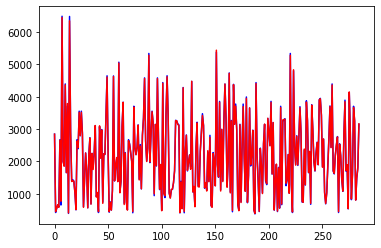

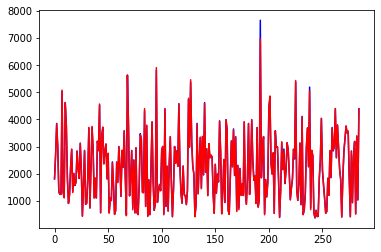

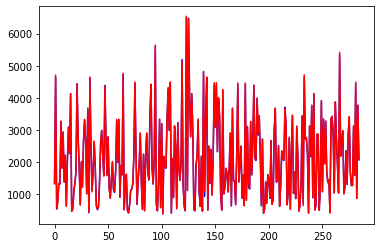

In [0]:
dataset_name = 'qsort_simulated_results'
dataset_path = 'qsort_simulated_PS.csv'
path_for_saving_data = dataset_name
process_all_svm_physical(dataset_path, dataset_name, path_for_saving_data)

Data X and Y shape (320, 21) (320,)
####################################################################
(288, 21) (32, 21) (288,) (32,)
Model Ran for this cross validation step: 1
APE: 0.32328218
(288, 21) (32, 21) (288,) (32,)
Model Ran for this cross validation step: 2
APE: 0.33093092
(288, 21) (32, 21) (288,) (32,)
Model Ran for this cross validation step: 3
APE: 0.34962857
(288, 21) (32, 21) (288,) (32,)
Model Ran for this cross validation step: 4
APE: 0.37274092
(288, 21) (32, 21) (288,) (32,)
Model Ran for this cross validation step: 5
APE: 0.37313986
(288, 21) (32, 21) (288,) (32,)
Model Ran for this cross validation step: 6
APE: 0.2301946
(288, 21) (32, 21) (288,) (32,)
Model Ran for this cross validation step: 7
APE: 0.30905572
(288, 21) (32, 21) (288,) (32,)
Model Ran for this cross validation step: 8
APE: 0.3194172
(288, 21) (32, 21) (288,) (32,)
Model Ran for this cross validation step: 9
APE: 0.31530872
(288, 21) (32, 21) (288,) (32,)
Model Ran for this cross validation s

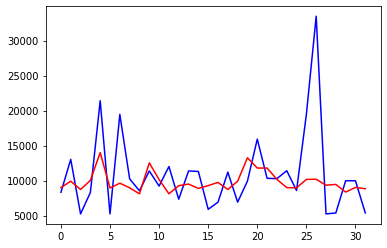

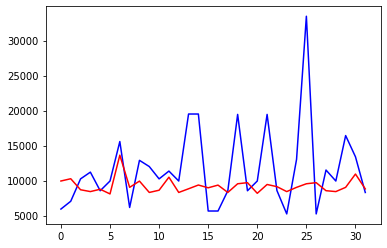

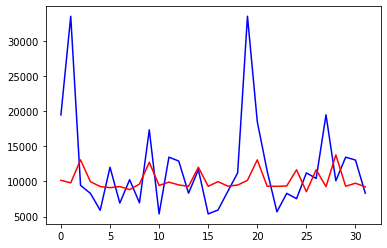

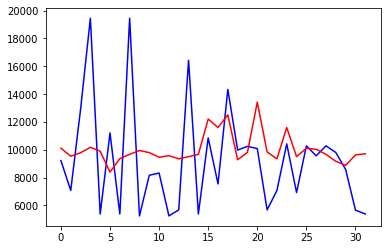

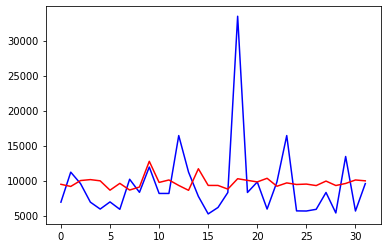

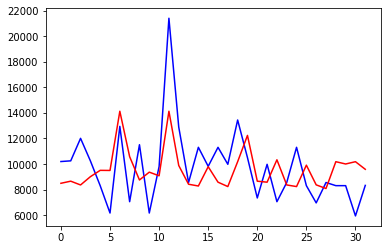

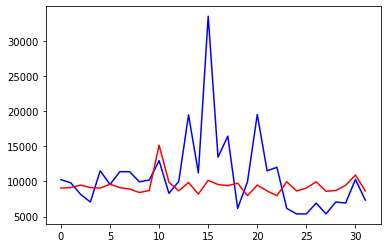

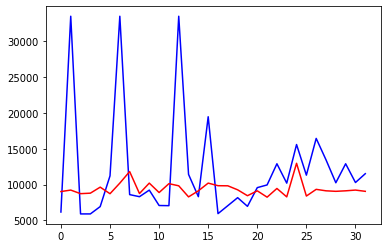

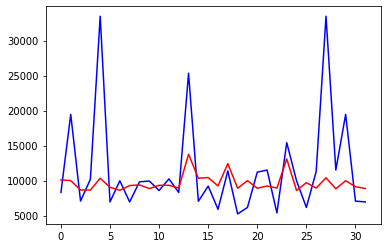

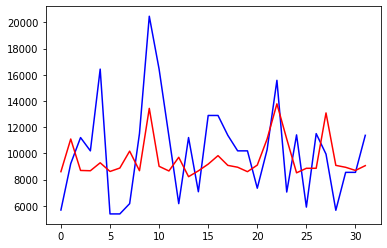

In [0]:
dataset_name = 'qsort_physical_results'
dataset_path = 'qsort_physical.csv'
path_for_saving_data = dataset_name
process_all_svm_physical(dataset_path, dataset_name, path_for_saving_data)